# **Import Necessary Libraries**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **Data Collection**

In [17]:
# Load the datase
df = pd.read_csv("/content/AEP_hourly.csv")


# **Data Preprocessing**

In [19]:
# Handle missing values
df = df.dropna()

# Remove duplicates based on the 'Datetime' column
df = df.drop_duplicates(subset='Datetime')

# Aggregate energy consumption values for duplicate datetime values
df = df.groupby('Datetime').agg({'AEP_MW': 'mean'}).reset_index()


# **Feature Extraction and Engineering**

In [21]:
# Feature Engineering
# Extracting Time-Based Features
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
X= df[['Hour', 'Day', 'Month', 'Year']]
y = df['AEP_MW']

# **Data Splitting**

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Selection and Training**

In [23]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions using the trained model
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


# **Evaluation and Analysis**

Train RMSE: 1074.902276846359
Test RMSE: 1099.9854804637769
R-squared (R2) Score: 0.8190578570283884
the maximum energy consumption year
                  Datetime   AEP_MW  Year  Month  Day  Hour
35525 2008-10-20 14:00:00  25695.0  2008     10   20    14
The minimum energy consumption year
                   Datetime  AEP_MW  Year  Month  Day  Hour
105195 2016-10-02 05:00:00  9581.0  2016     10    2     5


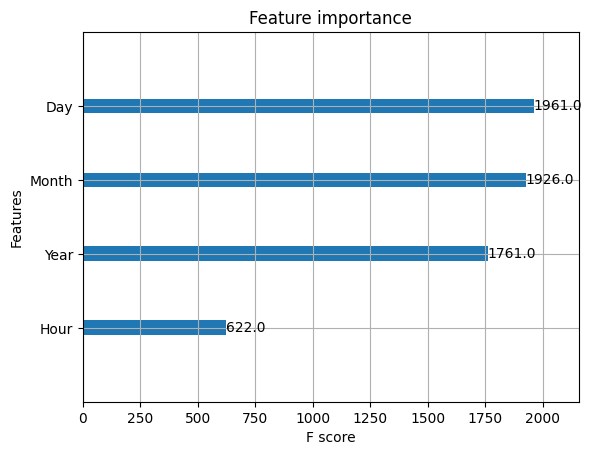

In [33]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"R-squared (R2) Score: {test_r2}")

# Additional Analysis
#feature importance to understand the model's decision-making process.
xgb.plot_importance(xgb_model)




## **When was the Highest Energy Consumption and which Year?**

Maximum

In [34]:
print("the maximum energy consumption year\n",df[df["AEP_MW"] ==df["AEP_MW"].max()])

the maximum energy consumption year
                  Datetime   AEP_MW  Year  Month  Day  Hour
35525 2008-10-20 14:00:00  25695.0  2008     10   20    14


Minimum

In [35]:
print("The minimum energy consumption year\n",df[df["AEP_MW"] == df["AEP_MW"].min()])

The minimum energy consumption year
                   Datetime  AEP_MW  Year  Month  Day  Hour
105195 2016-10-02 05:00:00  9581.0  2016     10    2     5


# **Visualizations**

1.Time Series Plot

2.Histogram and Density Plot

3.Heatmap Correlation

4.Box Plot



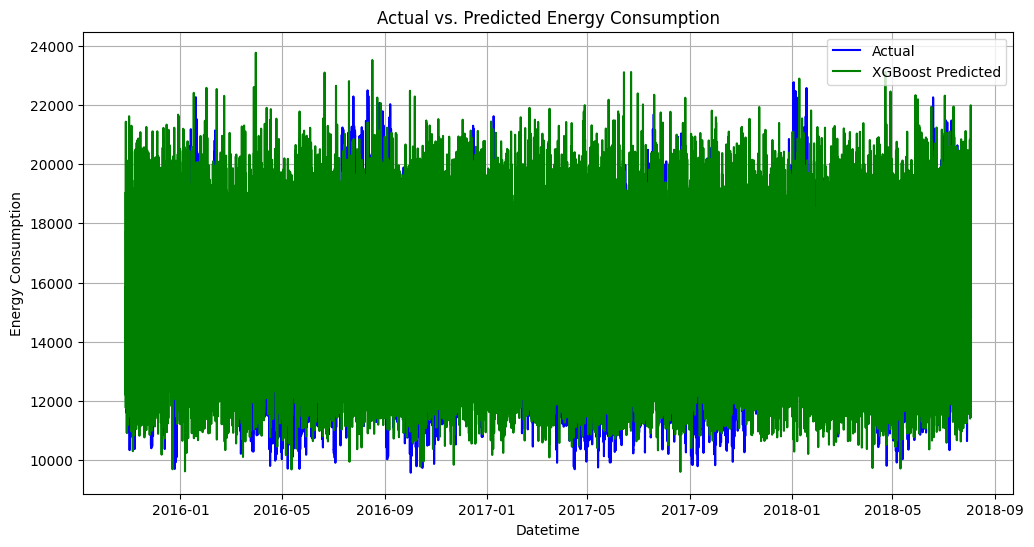

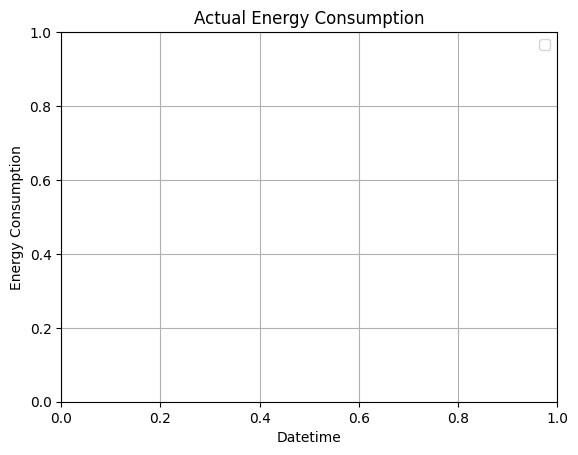

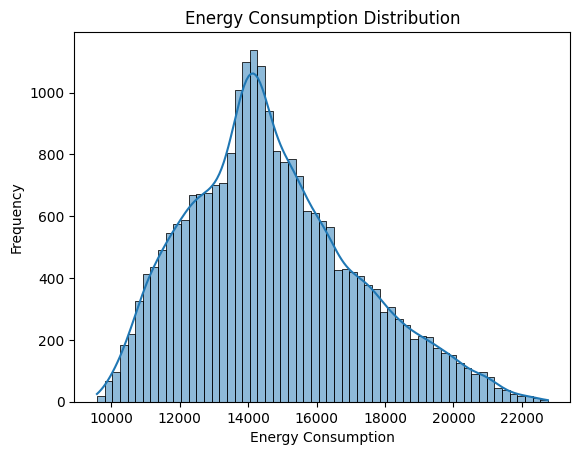

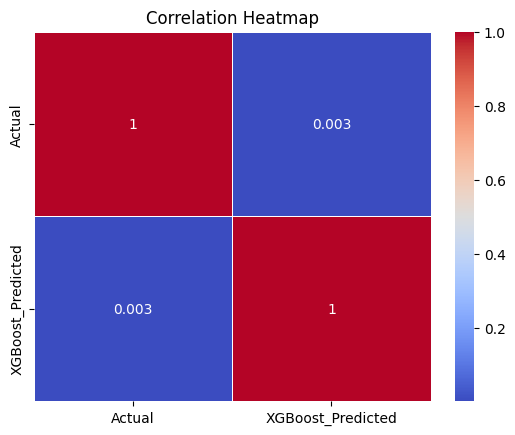

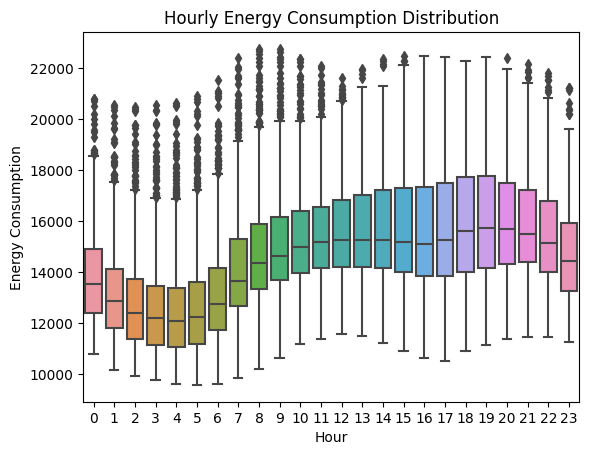

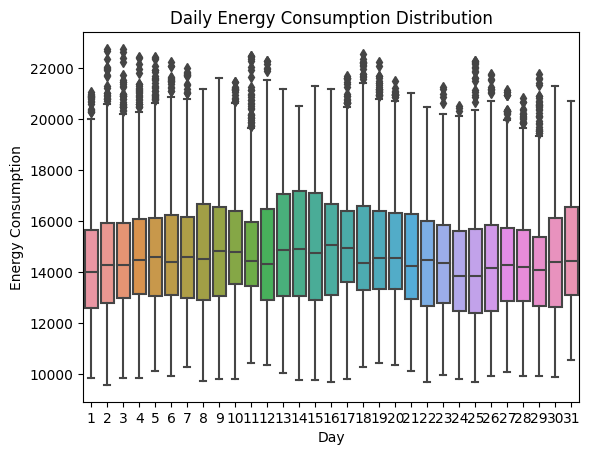

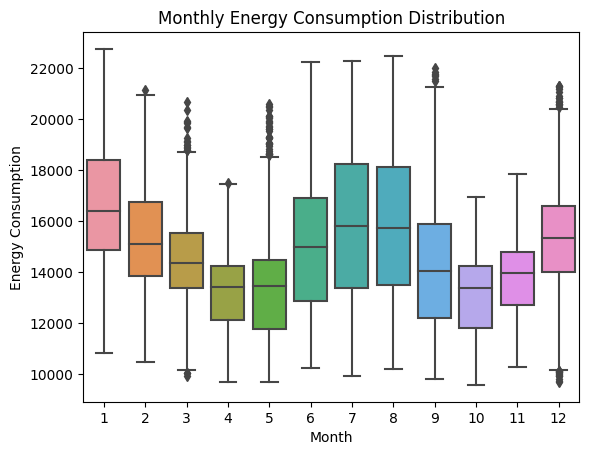

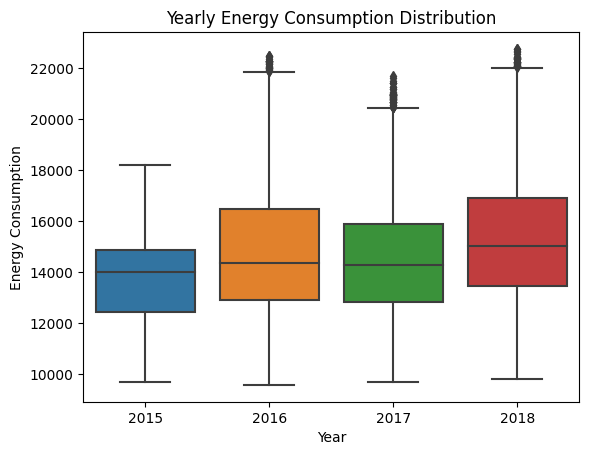

In [43]:
df = df[-len(y_test_pred):]  # Keep only the last N rows, where N is the length of y_test_pred



# Create a DataFrame to store the predictions and actual values
results = pd.DataFrame({
    'Datetime': df['Datetime'],
    'Actual': df['AEP_MW'], 'XGBoost_Predicted': y_test_pred  # Replace with XGBoost predicted values # Replace with your actual energy consumption values

    # Add more columns for other models' predictions, if available
})

# Set 'Datetime' as the index for better time-based visualization
results.set_index('Datetime', inplace=True)

# Plot the actual vs. predicted energy consumption
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['XGBoost_Predicted'], label='XGBoost Predicted', color='green')
# Add plots for predictions from other models, if available

plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# plots for predictions

#1.Time Series Plot
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.title('Actual Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

#2.Histogram and Density Plot
sns.histplot(results['Actual'], kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Energy Consumption Distribution')
plt.show()

#3.Heatmap Correlation
correlation_matrix = results.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#4.Box Plot

sns.boxplot(x=results.index.hour,y=results['Actual'])
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.title('Hourly Energy Consumption Distribution')
plt.show()

sns.boxplot(x=results.index.day, y=results['Actual'])
plt.xlabel('Day')
plt.ylabel('Energy Consumption')
plt.title('Daily Energy Consumption Distribution')
plt.show()

sns.boxplot(x=results.index.month, y=results['Actual'])
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.title('Monthly Energy Consumption Distribution')
plt.show()

sns.boxplot(x=results.index.year, y=results['Actual'])
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Yearly Energy Consumption Distribution')
plt.show()



# shows the Relationship of Energy vs Year

<Axes: xlabel='Year', ylabel='AEP_MW'>

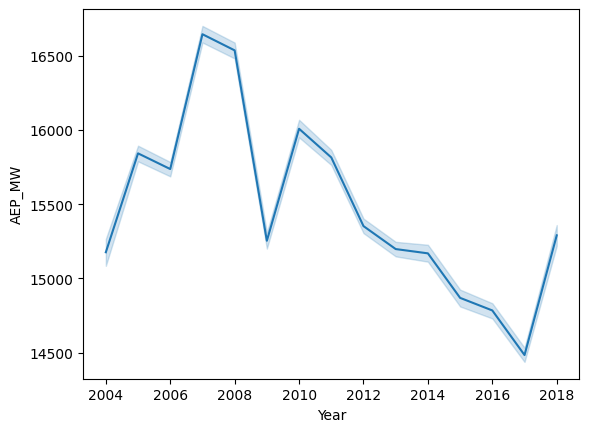

In [36]:
sns.lineplot(x=df["Year"],y=df["AEP_MW"], data=df)